# LetsGrowMore
## ***Virtual Internship Program***
***Data Science  Tasks***
### ***Author: SARAVANAVEL***


# ***ADVANCED LEVEL TASK***
### Task 9 -Handwritten equation solver using CNN 

Simple Mathematical equation solver using character and symbol regonition using image processing and CNN

## 1. Import Libraries/Packages

In [1]:
import numpy as np 
import pandas as pd 
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from imutils.contours import sort_contours
import imutils

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

## Data preprocessing 

In [3]:
print(os.listdir("./input")) #without extracting the data.rar file

['data-eqns', 'data.rar', 'extracted_images']


## Data Augementation

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    validation_split = 0.25
)

data_path='./input/extracted_images'
train_set = train_datagen.flow_from_directory(
    data_path, 
    target_size = (40, 40), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset='training',
    seed = 123
)
valid_set = train_datagen.flow_from_directory(
    data_path, 
    target_size = (40, 40), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset='validation',
    seed = 123
)

Found 147076 images belonging to 18 classes.
Found 49020 images belonging to 18 classes.


## Model Building

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(18, activation='softmax'))
# compile model
adam = tf.keras.optimizers.Adam(learning_rate = 5e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [6]:
history=model.fit(train_set,
          validation_data=valid_set,
          epochs=1,
          verbose=1)

4597/4597 [==============================] - 1004s 218ms/step - loss: 0.3427 - accuracy: 0.9000 - val_loss: 0.1915 - val_accuracy: 0.9427


## Model evaluation

In [7]:
val_loss, val_accuracy = model.evaluate(valid_set)
print(val_loss,val_accuracy)

1532/1532 [==============================] - 48s 31ms/step - loss: 0.1918 - accuracy: 0.9438
0.19178929924964905 0.9437780380249023


In [8]:
train_set.class_indices

{'(': 0,
 ')': 1,
 '+': 2,
 '-': 3,
 '0': 4,
 '1': 5,
 '2': 6,
 '3': 7,
 '4': 8,
 '5': 9,
 '6': 10,
 '7': 11,
 '8': 12,
 '9': 13,
 '=': 14,
 '[': 15,
 ']': 16,
 'div': 17}

print('\n',train_set.class_indices, sep = "\n")

In [9]:
label_map = (train_set.class_indices)
label_map

{'(': 0,
 ')': 1,
 '+': 2,
 '-': 3,
 '0': 4,
 '1': 5,
 '2': 6,
 '3': 7,
 '4': 8,
 '5': 9,
 '6': 10,
 '7': 11,
 '8': 12,
 '9': 13,
 '=': 14,
 '[': 15,
 ']': 16,
 'div': 17}

In [95]:
def prediction(img):
    #img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    img = cv2.resize(img,(40, 40))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    #norm_image=img/255
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = (model.predict_classes([case]))
    
    return ([i for i in train_set.class_indices if train_set.class_indices[i]==(pred[0])][0],pred)

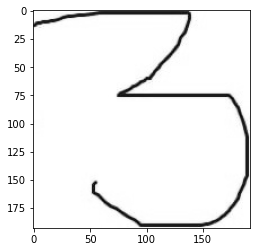

In [96]:
image = cv2.imread('./input/data-eqns/test_image1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        chars.append(prediction(roi))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

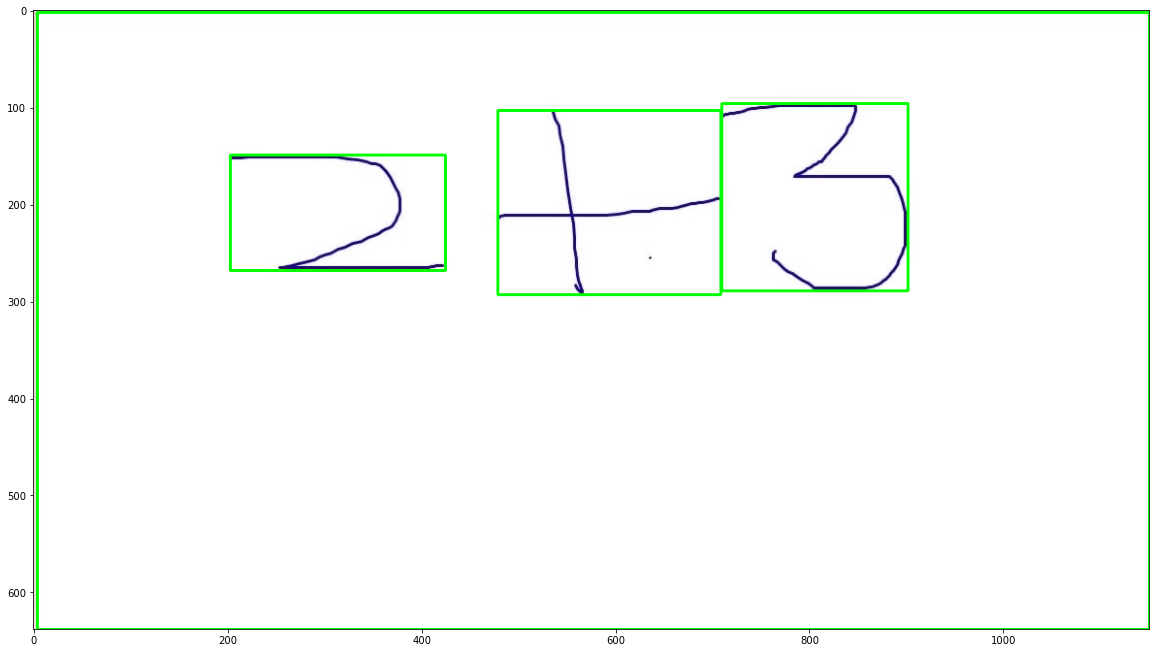

In [97]:
plt.figure(figsize=(20,20))
plt.imshow(image)

In [98]:
chars

[('+', array([2], dtype=int64)),
 ('2', array([6], dtype=int64)),
 ('+', array([2], dtype=int64)),
 ('3', array([7], dtype=int64))]

In [99]:
labels=[i for i in train_set.class_indices]
print(labels)

['(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '[', ']', 'div']


In [100]:
eq=[]
pos=[]
for i in ((chars)):
    if len(eq)==0 and i[0][0] in labels[3:]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[4:14]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[:4]:
        eq.append(i[0][0])
        pos.append(len(eq))
    else:
        pass

In [101]:
for i in pos:
    if eq[i-1]=='+':
        print(int(''.join(eq[:pos[0]-1]))+int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='%': 
        print(int(''.join(eq[:pos[0]-1]))/int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='*':
        print(int(''.join(eq[:pos[0]-1]))*int(''.join(eq[pos[0]:])))
    else:
        print(int(''.join(eq[:pos[0]-1]))-int(''.join(eq[pos[0]:])))

5


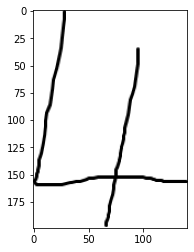

In [102]:
image = cv2.imread('./input/data-eqns/test0.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        chars.append(prediction(roi))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

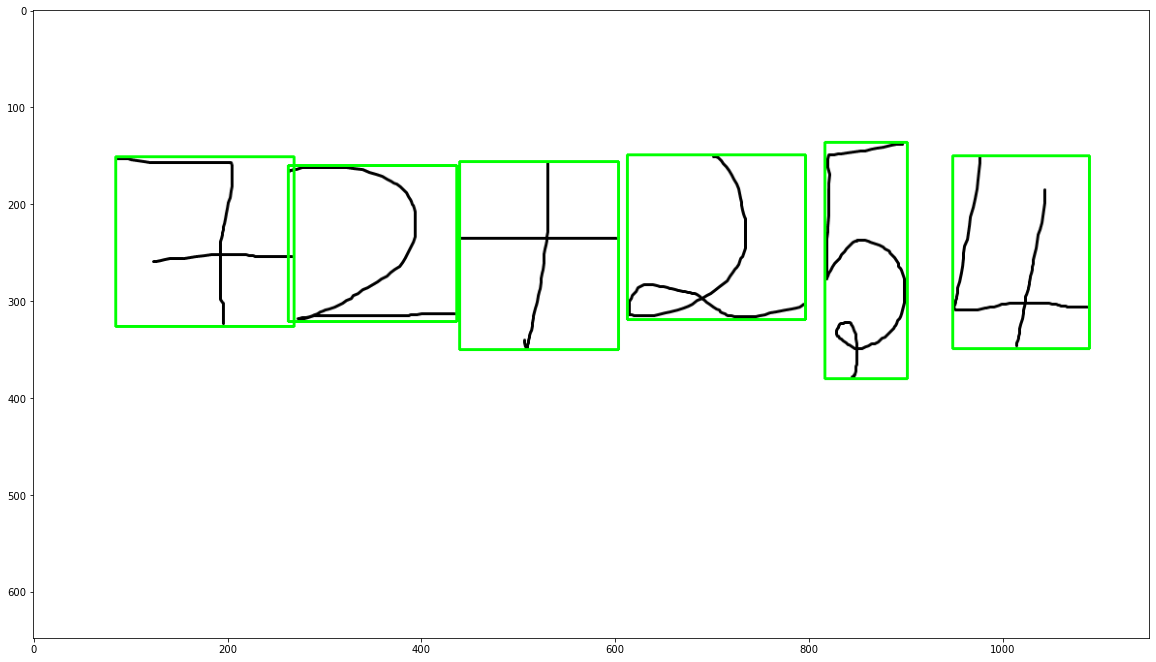

In [103]:
plt.figure(figsize=(20,20))
plt.imshow(image)

In [104]:
chars

[('7', array([11], dtype=int64)),
 ('2', array([6], dtype=int64)),
 ('+', array([2], dtype=int64)),
 ('2', array([6], dtype=int64)),
 ('5', array([9], dtype=int64)),
 ('4', array([8], dtype=int64))]

In [105]:
labels=[i for i in train_set.class_indices]
print(labels)

['(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', '[', ']', 'div']


In [106]:
eq=[]
pos=[]
for i in ((chars)):
    if len(eq)==0 and i[0][0] in labels[3:]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[4:14]:
        eq.append(i[0][0])
    elif len(eq)>0 and i[0][0] in labels[:4]:
        eq.append(i[0][0])
        pos.append(len(eq))
    else:
        pass

In [107]:
for i in pos:
    if eq[i-1]=='+':
        print(int(''.join(eq[:pos[0]-1]))+int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='%': 
        print(int(''.join(eq[:pos[0]-1]))/int(''.join(eq[pos[0]:])))
    elif eq[i-1]=='*':
        print(int(''.join(eq[:pos[0]-1]))*int(''.join(eq[pos[0]:])))
    else:
        print(int(''.join(eq[:pos[0]-1]))-int(''.join(eq[pos[0]:])))

326


# THANK YOU!!